## Bibliotecas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [15]:
vgsales = pd.read_csv("vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1 - Como é o histórico de vendas na América do Norte?

Para responder essa questão precisamos olhar a data juntamente com as vendas na américa do norte.

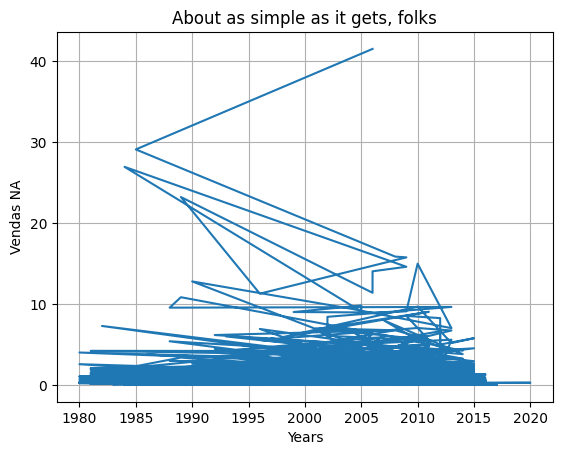

In [16]:
# Está errado, havia esquecido de agrupar os anos
fig, ax = plt.subplots()
ax.plot(vgsales["Year"], vgsales["NA_Sales"])

ax.set(xlabel="Years", ylabel="Vendas NA", title="About as simple as it gets, folks")
ax.grid()
plt.show()

In [17]:
# Agrupando por anoe somando as vendas

agrupando = vgsales[["Year", 
                     "NA_Sales", 
                     "EU_Sales", 
                     "JP_Sales", 
                     "Other_Sales", 
                     "Global_Sales"]].groupby("Year").agg(lambda x: sum(x)).reset_index()

agrupando.tail(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,2014.0,131.97,125.65,39.46,40.02,337.05
35,2015.0,102.82,97.71,33.72,30.01,264.44
36,2016.0,22.66,26.76,13.70,7.75,70.93
37,2017.0,0.00,0.00,0.05,0.00,0.05
38,2020.0,0.27,0.00,0.00,0.02,0.29


In [18]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


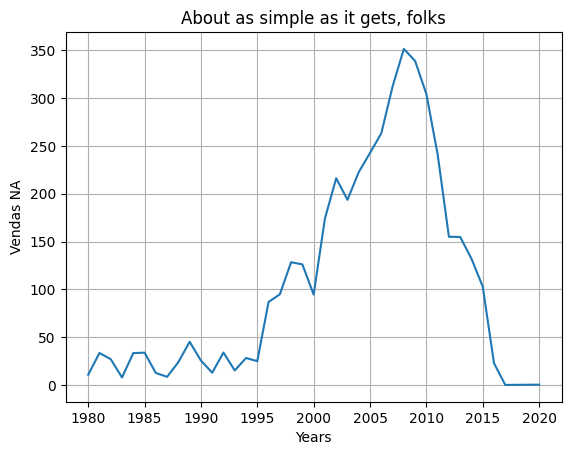

In [19]:
fig, ax = plt.subplots()
ax.plot(agrupando["Year"], agrupando["NA_Sales"])

ax.set(xlabel="Years", ylabel="Vendas NA", title="About as simple as it gets, folks")
ax.grid()
plt.show()

### 2 - E nos outros continentes?

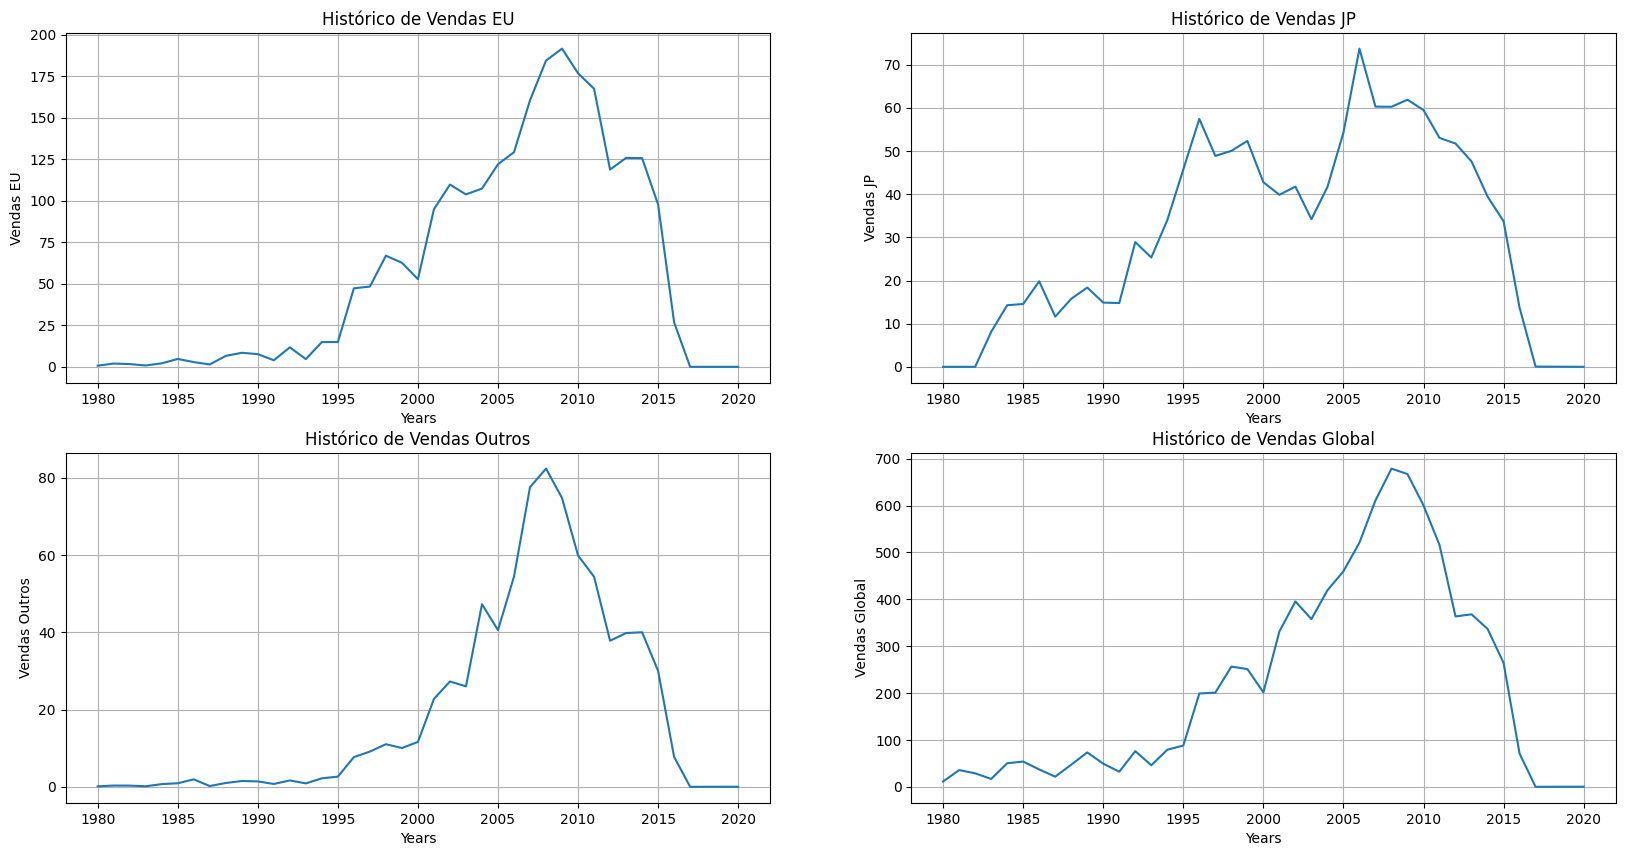

In [20]:
# Plotando todos outros juntos
fig, axs = plt.subplots(2, 2, figsize = (20,10))
axs[0,0].plot(agrupando["Year"], agrupando["EU_Sales"])
axs[0,1].plot(agrupando["Year"], agrupando["JP_Sales"])
axs[1,1].plot(agrupando["Year"], agrupando["Global_Sales"])
axs[1,0].plot(agrupando["Year"], agrupando["Other_Sales"])

axs[0,0].set(xlabel="Years", ylabel="Vendas EU", title="Histórico de Vendas EU")
axs[0,1].set(xlabel="Years", ylabel="Vendas JP", title="Histórico de Vendas JP")
axs[1,1].set(xlabel="Years", ylabel="Vendas Global", title="Histórico de Vendas Global")
axs[1,0].set(xlabel="Years", ylabel="Vendas Outros", title="Histórico de Vendas Outros")

axs[0,0].grid()
axs[0,1].grid()
axs[1,1].grid()
axs[1,0].grid()

plt.show()

#### **Observando todas as regiões juntas**

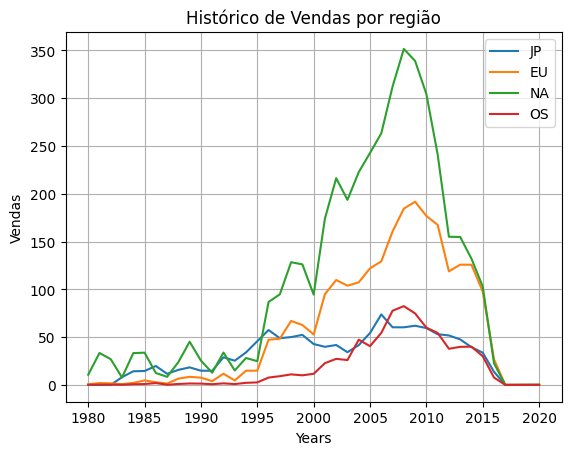

In [21]:
fig, ax = plt.subplots()
ax.plot(agrupando["Year"], agrupando["JP_Sales"], label="JP")
ax.plot(agrupando["Year"], agrupando["EU_Sales"], label="EU")
ax.plot(agrupando["Year"], agrupando["NA_Sales"], label="NA")
ax.plot(agrupando["Year"], agrupando["Other_Sales"], label="OS")
ax.set(xlabel="Years", ylabel="Vendas", title="Histórico de Vendas por região")
ax.grid()
ax.legend()
plt.show()

### 3 - Existem vários tipos de jogos nesses dados, eles são todos iguais em relação às vendas da América do Norte? E nos outros?

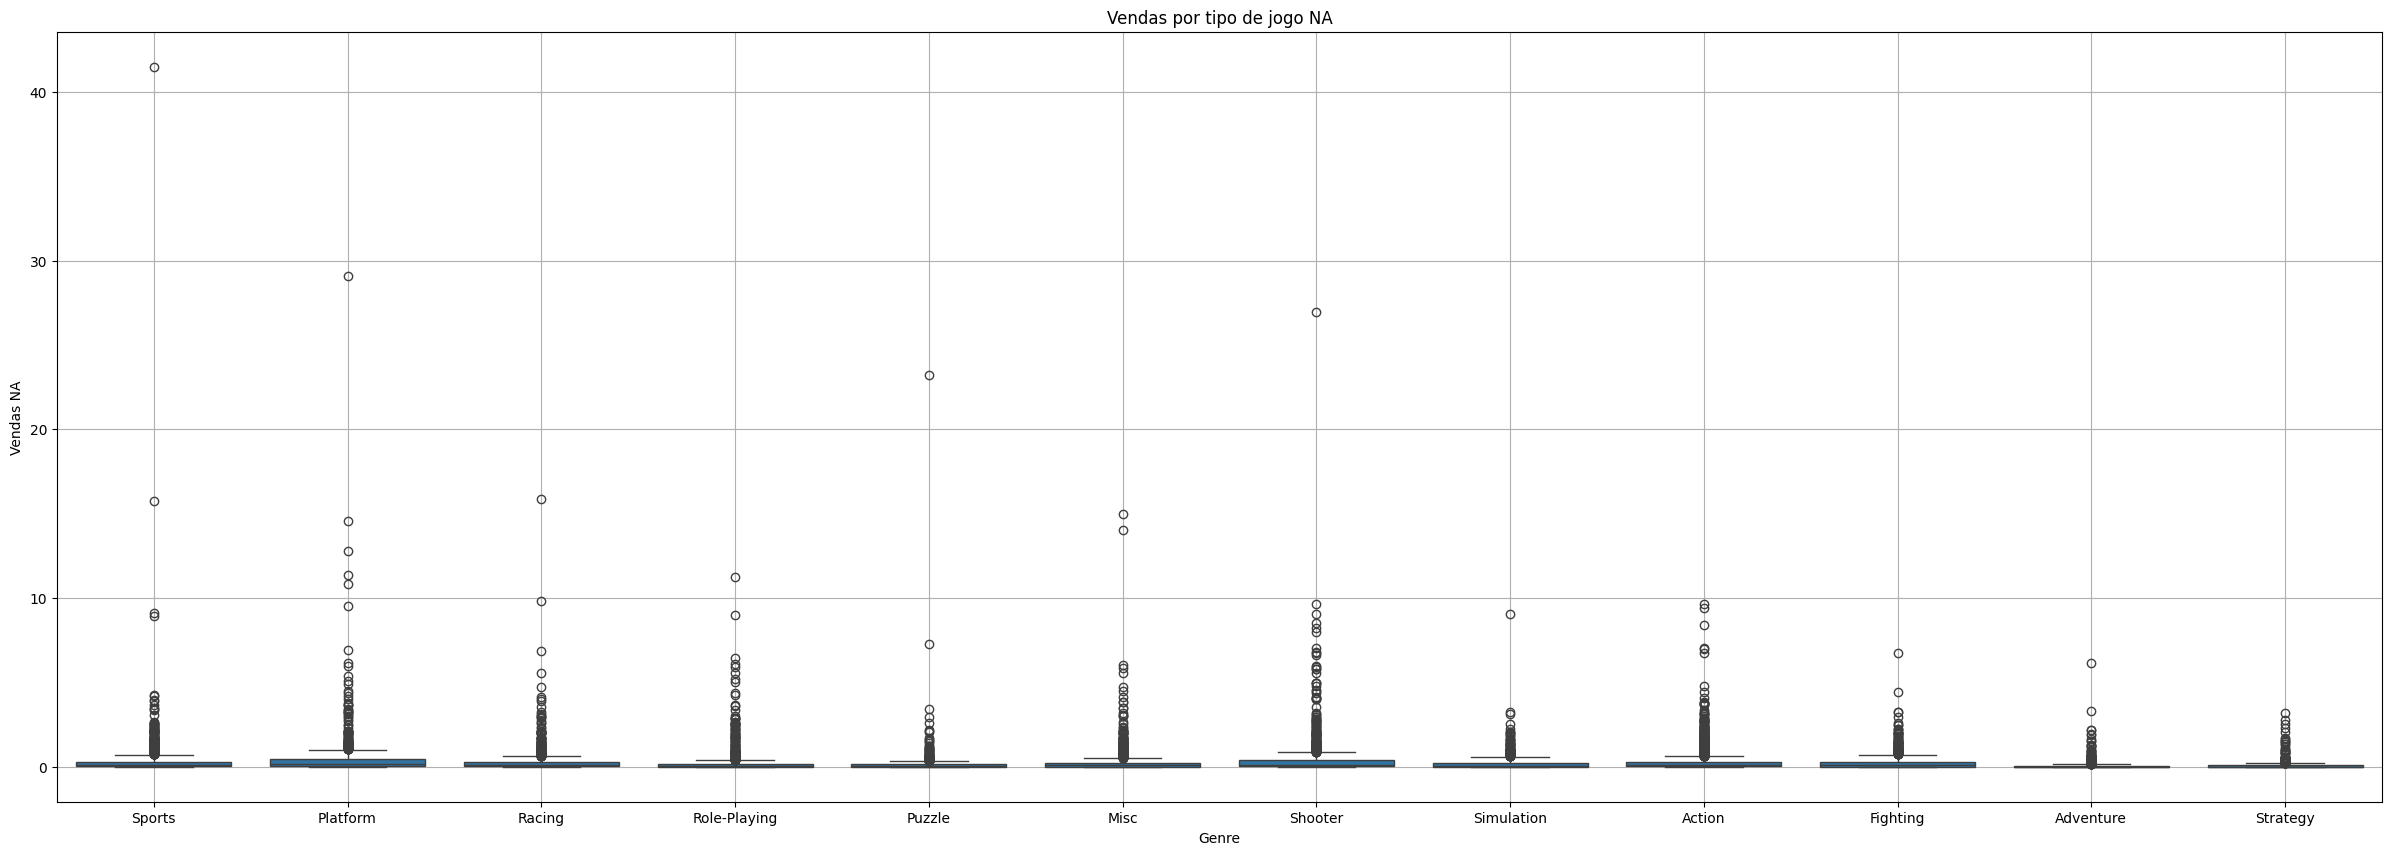

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=vgsales, x=vgsales["Genre"], y=vgsales["NA_Sales"])

ax.set(ylabel="Vendas NA", title = "Vendas por tipo de jogo NA")
ax.grid()
plt.show()

In [29]:
vgsales["NA_Sales"][vgsales["Genre"] == "Sports"].describe()

count    2346.000000
mean        0.291283
std         1.041024
min         0.000000
25%         0.020000
50%         0.110000
75%         0.300000
max        41.490000
Name: NA_Sales, dtype: float64

Vemos que o comportamento está parecido, mas com muitos outliers os gráficos ficam bem achatados.
Portanto podemos verificar também o total em cada tipo.

In [23]:
# Agrupando pelo tipo de jogo
ag_genre = vgsales[["Genre", 
                    "NA_Sales", 
                    "EU_Sales", 
                    "JP_Sales", 
                    "Other_Sales", 
                    "Global_Sales"]].groupby("Genre").agg(lambda x: sum(x)).reset_index()
ag_genre.tail(5)


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20
10,Sports,683.35,376.85,135.37,134.97,1330.93
11,Strategy,68.70,45.34,49.46,11.36,175.12


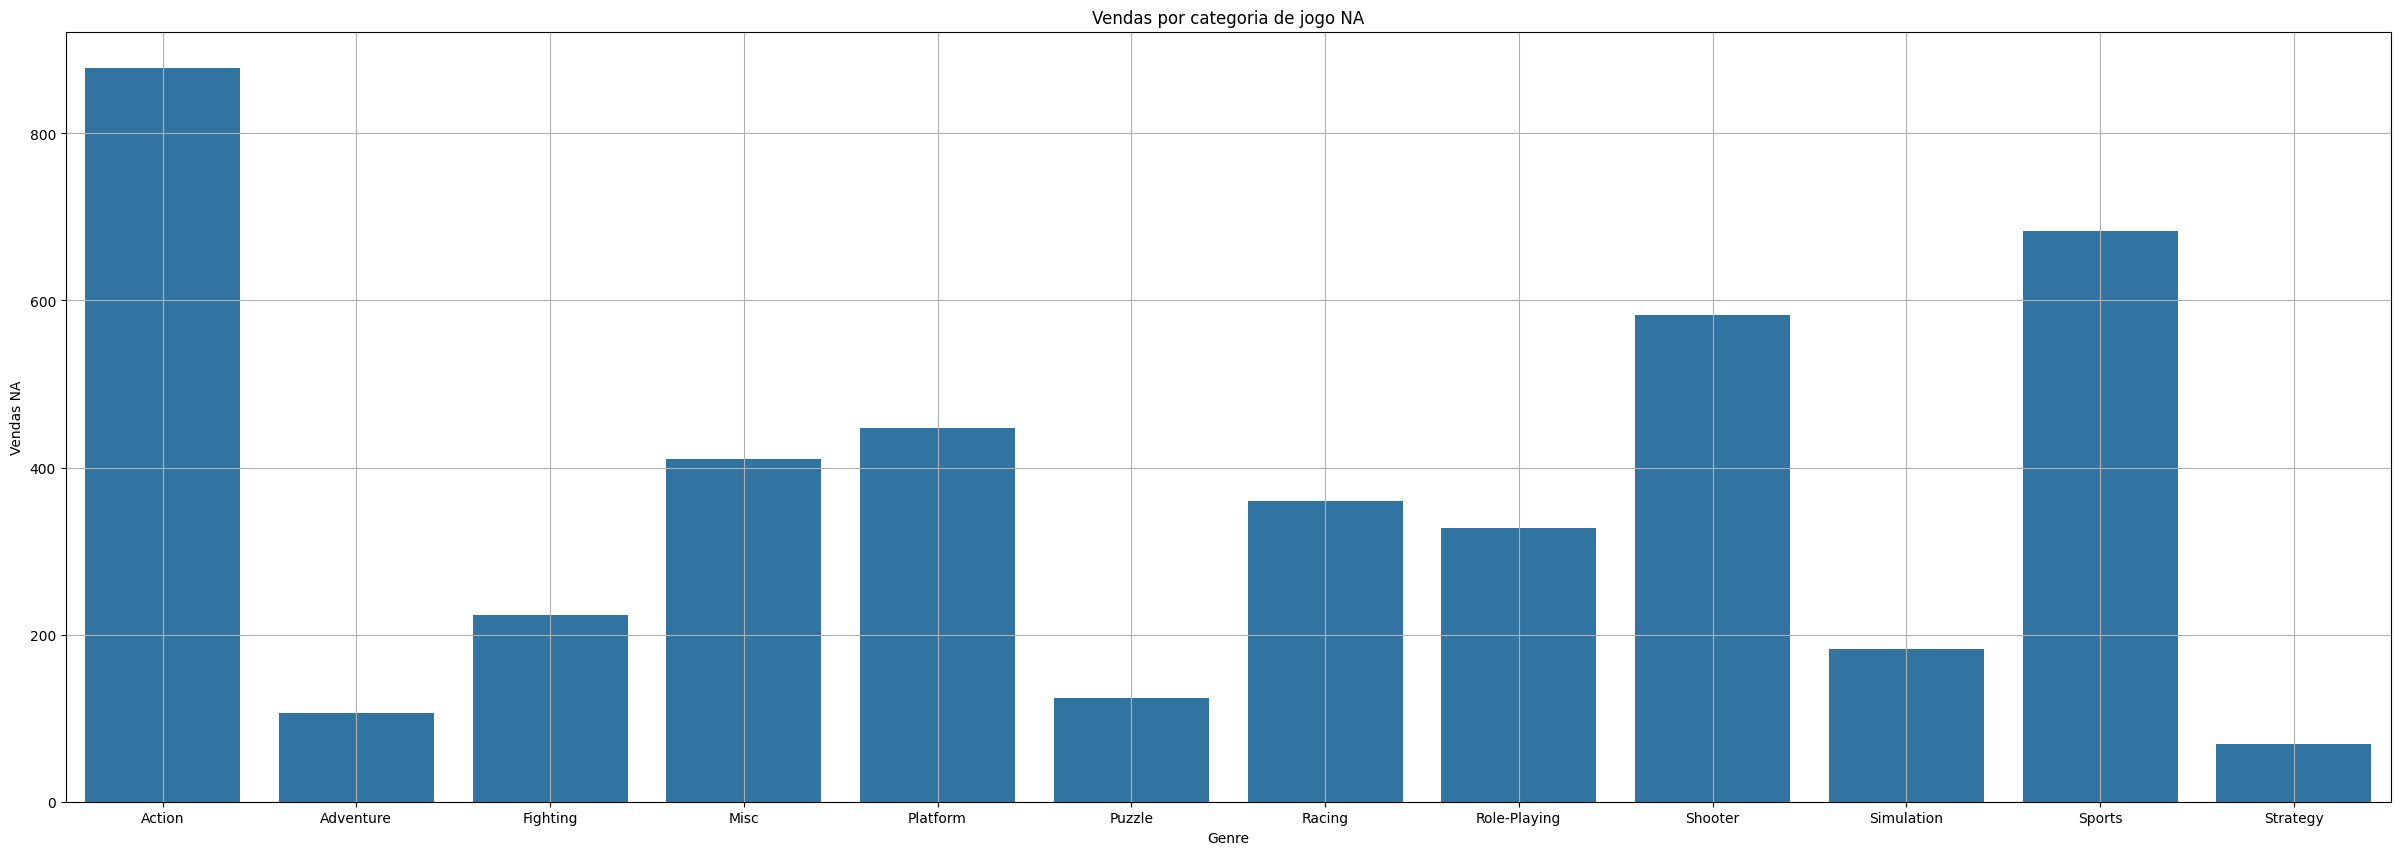

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(data=ag_genre, x=ag_genre["Genre"], y=ag_genre["NA_Sales"])

ax.set(ylabel="Vendas NA", title="Vendas por categoria de jogo NA")
ax.grid()
plt.show()

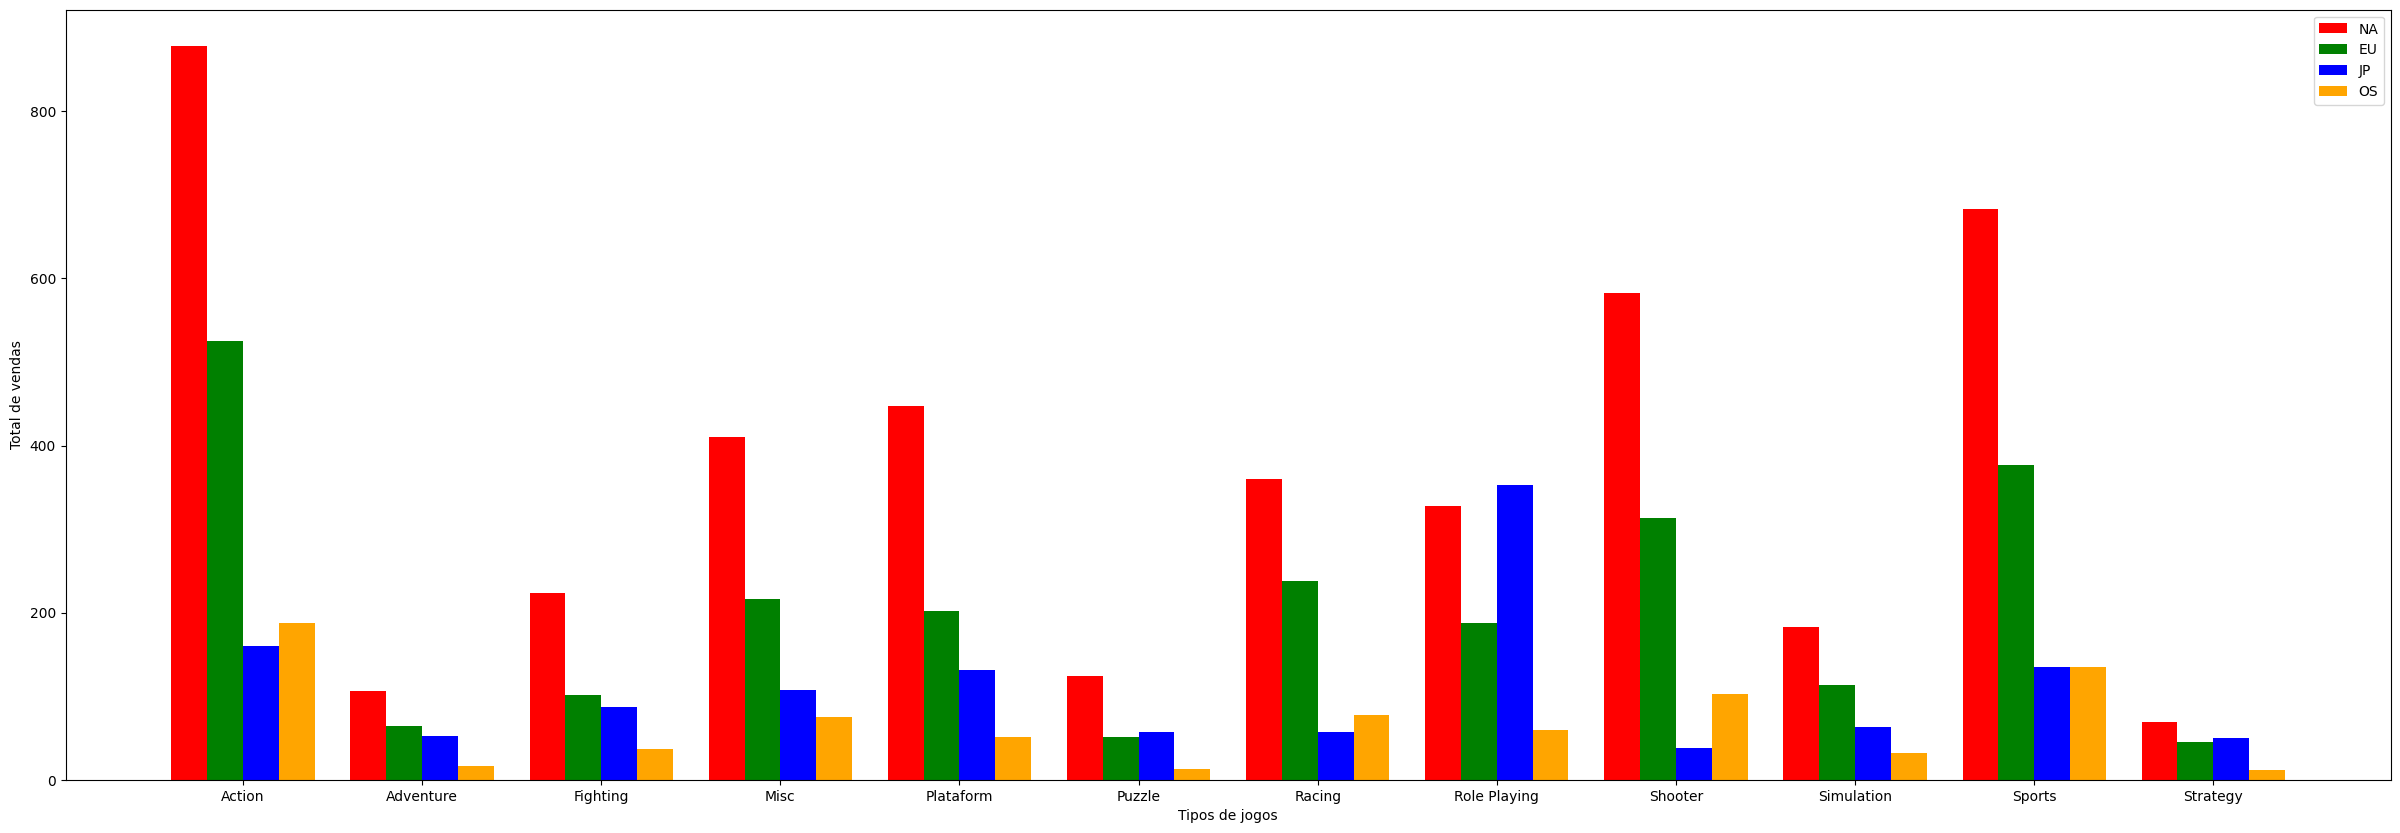

In [25]:
fig, axs = plt.subplots(figsize=(30,10))
NA_s = ag_genre["NA_Sales"]
EU_s = ag_genre["EU_Sales"]
JP_s = ag_genre["JP_Sales"]
OS_s = ag_genre["Other_Sales"]

tst = np.arange(len(ag_genre["Genre"]))
width = 0.20

NA = plt.bar(tst, height=NA_s, width=width, color="red")
EU = plt.bar(tst+width, height=EU_s, width=width, color="green")
JP = plt.bar(tst+width*2, height=JP_s, width=width, color="blue")
OS = plt.bar(tst+width*3, height=OS_s, width=width, color="orange")

plt.xlabel("Tipos de jogos")
plt.ylabel("Total de vendas")

plt.xticks(tst+3/2*width, ["Action", 
                               "Adventure", 
                               "Fighting", 
                               "Misc", 
                               "Plataform", 
                               "Puzzle", 
                               "Racing", 
                               "Role Playing",
                               "Shooter",
                               "Simulation",
                               "Sports",
                               "Strategy"])
plt.legend((NA, EU, JP, OS), ("NA", "EU", "JP", "OS"))
plt.show()

count    2346.000000
mean        0.291283
std         1.041024
min         0.000000
25%         0.020000
50%         0.110000
75%         0.300000
max        41.490000
Name: NA_Sales, dtype: float64